# Feature Selection with Categorical Data

## The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [3]:
# DermaDetect Copyright (C), 2021

from sklearn import tree
import pandas as pd
import pickle
import argparse
import os
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
import sklearn
print(sklearn.__version__)

0.24.2


In [5]:
data_relative_path = 'F:\Python\Data Science\8200bio_derma_detect\public_8200bio_challenge-main\data\dd_data.csv'
data = pd.read_csv(data_relative_path)
data.head()

,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_toes,is_secondary_locations_toes_external,is_secondary_locations_toes_internal,is_secondary_locations_tongue,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,is_secondary_locations_vaginal_region,is_secondary_locations_wrist_external,is_secondary_locations_wrist_internal,diagnosis
0,34.0,False,False,pea,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,True,eczema uns
1,41.0,False,False,unknown,unknown,False,female,False,False,unknown,...,False,False,False,False,False,False,False,False,False,contact dermatitis
2,25.0,False,False,pea,non-round,False,male,False,False,multiple,...,False,False,False,False,False,False,False,False,False,verruca vulgaris
3,49.0,False,True,>palm,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,tinea versicolor
4,21.0,False,False,pea,round,False,female,False,False,clustered,...,False,False,False,False,False,False,False,False,False,seborrheic dermatitis


In [6]:
data.dtypes

age                                          float64
pus                                             bool
itch                                            bool
size                                          object
shape                                         object
                                              ...   
is_secondary_locations_upper_arm_internal       bool
is_secondary_locations_vaginal_region           bool
is_secondary_locations_wrist_external           bool
is_secondary_locations_wrist_internal           bool
diagnosis                                     object
Length: 108, dtype: object

In [7]:
# how many labels per each feature:
for col in data.columns:   
    print(col, ': ', len(data[col].unique()), 'labels')

age :  105 labels
pus :  2 labels
itch :  2 labels
size :  5 labels
shape :  3 labels
crater :  2 labels
gender :  2 labels
vesicle :  2 labels
bleeding :  2 labels
quantity :  5 labels
swelling :  2 labels
topography :  4 labels
temperature :  7 labels
duration.days :  8 labels
duration.from_birth :  1 labels
pain.is_pain :  2 labels
lossOfHair.type :  2 labels
lossOfHair.exist :  2 labels
pain.pain_type :  3 labels
location.coverage :  3 labels
is_texture_cracks :  2 labels
is_texture_dry :  2 labels
is_texture_exfoliation :  2 labels
is_texture_not_sure :  2 labels
is_texture_rough :  1 labels
is_texture_scales :  2 labels
is_texture_smooth :  1 labels
is_texture_wet :  2 labels
is_color_condition_black :  2 labels
is_color_condition_blue :  2 labels
is_color_condition_brown :  2 labels
is_color_condition_green :  2 labels
is_color_condition_grey :  2 labels
is_color_condition_normal :  2 labels
is_color_condition_purple :  2 labels
is_color_condition_red :  2 labels
is_color_condit

# drop the columns which only have a single unique value:

In [8]:
# drop the columns which only have a single unique value:
nunique = data.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)                              # Show the list of columns
data = data.drop(cols_to_drop, axis=1)
data.head()

Index(['duration.from_birth', 'is_texture_rough', 'is_texture_smooth',
       'is_nailsdiseases_leukonychia__white_spots_',
       'is_nailsdiseases_mees__lines', 'is_primary_locations_buttock',
       'is_secondary_locations_foot', 'is_secondary_locations_hand',
       'is_secondary_locations_toes_external',
       'is_secondary_locations_toes_internal'],
      dtype='object')


,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_thigh_external,is_secondary_locations_thigh_internal,is_secondary_locations_toes,is_secondary_locations_tongue,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,is_secondary_locations_vaginal_region,is_secondary_locations_wrist_external,is_secondary_locations_wrist_internal,diagnosis
0,34.0,False,False,pea,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,True,eczema uns
1,41.0,False,False,unknown,unknown,False,female,False,False,unknown,...,False,False,False,False,False,False,False,False,False,contact dermatitis
2,25.0,False,False,pea,non-round,False,male,False,False,multiple,...,False,False,False,False,False,False,False,False,False,verruca vulgaris
3,49.0,False,True,>palm,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,tinea versicolor
4,21.0,False,False,pea,round,False,female,False,False,clustered,...,False,False,False,False,False,False,False,False,False,seborrheic dermatitis


# look at the data

In [9]:
print(data.info())

#print(data[[data.isnull().sum()]])   # a list of the columns which have missing values
print(data.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        900 non-null    float64
 1   pus                                        900 non-null    bool   
 2   itch                                       900 non-null    bool   
 3   size                                       900 non-null    object 
 4   shape                                      900 non-null    object 
 5   crater                                     900 non-null    bool   
 6   gender                                     900 non-null    object 
 7   vesicle                                    900 non-null    bool   
 8   bleeding                                   900 non-null    bool   
 9   quantity                                   900 non-null    object 
 10  swelling                  

# High number of missing data

In [10]:
# Count total missing values in a dataframe
print(data.isnull().sum().sum())

# show a list of the columns which have missing values
data.columns[data.isnull().any()].tolist() 


1591


['pain.pain_type', 'location.coverage']

In [11]:
# show all the Nan columns in descending order
data.isnull().sum().sort_values(ascending = False)

location.coverage              845
pain.pain_type                 746
age                              0
is_secondary_locations_lips      0
is_secondary_locations_knee      0
                              ... 
is_color_condition_purple        0
is_color_condition_normal        0
is_color_condition_grey          0
is_color_condition_green         0
diagnosis                        0
Length: 98, dtype: int64

## drop features with missing data

In [12]:
#Drop dataframe columns based on NaN percentage
# Delete columns containing mor than 50%  NaN Values
#Keep only the rows with at least 50% non-NA values.
data = data.dropna( axis=1, thresh=450)
data.head()                              # 2 columns dropped


,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_thigh_external,is_secondary_locations_thigh_internal,is_secondary_locations_toes,is_secondary_locations_tongue,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,is_secondary_locations_vaginal_region,is_secondary_locations_wrist_external,is_secondary_locations_wrist_internal,diagnosis
0,34.0,False,False,pea,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,True,eczema uns
1,41.0,False,False,unknown,unknown,False,female,False,False,unknown,...,False,False,False,False,False,False,False,False,False,contact dermatitis
2,25.0,False,False,pea,non-round,False,male,False,False,multiple,...,False,False,False,False,False,False,False,False,False,verruca vulgaris
3,49.0,False,True,>palm,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,tinea versicolor
4,21.0,False,False,pea,round,False,female,False,False,clustered,...,False,False,False,False,False,False,False,False,False,seborrheic dermatitis


# Encoding the target

In [13]:
# Encode TARGET  features
#LabelEncode Target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                                     # initialize
data['diagnosis'] = le.fit_transform(data['diagnosis'])
y_name_mapping = dict(zip(le.fit_transform(le.classes_), le.classes_))  #translation of the encoding
y_name_mapping
  

{0: 'acne vulgaris',
 1: 'actinic keratosis',
 2: 'alopecia',
 3: 'contact dermatitis',
 4: 'eczema uns',
 5: 'folliculitis',
 6: 'hematoma uns',
 7: 'herpes simplex',
 8: 'insect bite',
 9: 'intertrigo',
 10: 'keratosis pilaris',
 11: 'melasma',
 12: 'molluscum contagiosum',
 13: 'onychomycosis',
 14: 'paronychia finger',
 15: 'pityriasis rosea',
 16: 'post inflammatory hyperpigmentation',
 17: 'psoriasis',
 18: 'rosacea',
 19: 'scar',
 20: 'seborrheic dermatitis',
 21: 'seborrheic keratosis',
 22: 'skin tag',
 23: 'tinea pedis',
 24: 'tinea versicolor',
 25: 'urticaria',
 26: 'verruca vulgaris',
 27: 'viral exanthem uns',
 28: 'vitiligo',
 29: 'xerosis cutis'}

# looking at numerical data

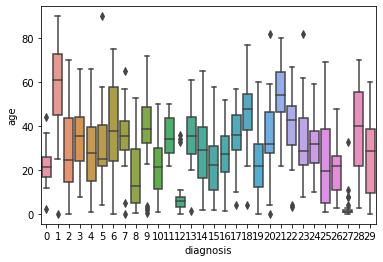

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='diagnosis', y='age', data=data)
#plt.xticks(rotation=45)

### There are differences between age and diagnosis

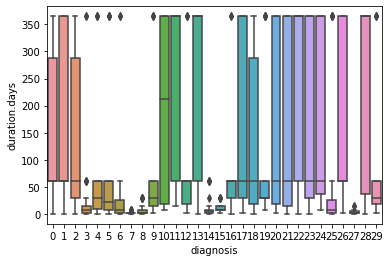

In [15]:
ax = sns.boxplot(x='diagnosis', y='duration.days', data=data)

# Filter Low variance

In [16]:
data_var = data.var()
print(data_var.sort_values(ascending = False))
col_low_var = data_var[data_var < 0.01].index
data = data.drop(col_low_var, axis=1)               # 28 columns were dropped
data.head()


duration.days                            21594.701500
age                                        356.684697
diagnosis                                   75.000000
is_color_condition_red                       0.250247
is_texture_dry                               0.248764
                                             ...     
is_color_condition_green                     0.002220
is_secondary_locations_navel                 0.002220
is_nailsdiseases_terry_s_nails               0.001111
is_secondary_locations_vaginal_region        0.001111
is_secondary_locations_wrist_external        0.001111
Length: 90, dtype: float64


C:\Users\shush\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_nose,is_secondary_locations_perioral,is_secondary_locations_scalp,is_secondary_locations_shin_external,is_secondary_locations_shoulders,is_secondary_locations_thigh_external,is_secondary_locations_toes,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,diagnosis
0,34.0,False,False,pea,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,4
1,41.0,False,False,unknown,unknown,False,female,False,False,unknown,...,False,False,False,False,False,False,False,False,False,3
2,25.0,False,False,pea,non-round,False,male,False,False,multiple,...,False,False,False,False,False,False,False,False,False,26
3,49.0,False,True,>palm,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,24
4,21.0,False,False,pea,round,False,female,False,False,clustered,...,False,False,False,False,False,False,False,False,False,20


In [17]:
'''
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(data[bool_columns])
'''

'\nfrom sklearn.feature_selection import VarianceThreshold\nselector = VarianceThreshold()\nsel = VarianceThreshold(threshold=(.8 * (1 - .8)))\nsel.fit_transform(data[bool_columns])\n'

# High correlation filter

In [18]:
data[data.corr() > 0.5].index                # No feature correlations of over 0.5


RangeIndex(start=0, stop=900, step=1)

# Transform and Create a pipeline

# devide columns according to dtype

In [19]:
obj_columns = data.select_dtypes(include=['object']).columns
print(obj_columns)
num_columns = data.select_dtypes(include=['float64']).columns
print(num_columns)
bool_columns = data.select_dtypes(include=['bool']).columns
data[(bool_columns)]

Index(['size', 'shape', 'gender', 'quantity', 'topography', 'lossOfHair.type'], dtype='object')
Index(['age', 'temperature', 'duration.days'], dtype='object')


,pus,itch,crater,vesicle,bleeding,swelling,pain.is_pain,lossOfHair.exist,is_texture_cracks,is_texture_dry,...,is_secondary_locations_neck,is_secondary_locations_nose,is_secondary_locations_perioral,is_secondary_locations_scalp,is_secondary_locations_shin_external,is_secondary_locations_shoulders,is_secondary_locations_thigh_external,is_secondary_locations_toes,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
897,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Convert booleans into integers

In [20]:
data[(bool_columns)] = data[(bool_columns)] * 1
data[(bool_columns)]

,pus,itch,crater,vesicle,bleeding,swelling,pain.is_pain,lossOfHair.exist,is_texture_cracks,is_texture_dry,...,is_secondary_locations_neck,is_secondary_locations_nose,is_secondary_locations_perioral,is_secondary_locations_scalp,is_secondary_locations_shin_external,is_secondary_locations_shoulders,is_secondary_locations_thigh_external,is_secondary_locations_toes,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
data[(obj_columns)]

,size,shape,gender,quantity,topography,lossOfHair.type
0,pea,round,female,multiple,skin_level,focal
1,unknown,unknown,female,unknown,unknown,focal
2,pea,non-round,male,multiple,below,focal
3,>palm,round,female,multiple,skin_level,focal
4,pea,round,female,clustered,skin_level,focal
...,...,...,...,...,...,...
895,palm,round,male,clustered,skin_level,focal
896,palm,non-round,female,single,skin_level,focal
897,palm,non-round,male,multiple,skin_level,diffused
898,handwatch,non-round,male,multiple,skin_level,focal


In [22]:
data['size'].value_counts()

pea          457
handwatch    254
palm          94
unknown       55
>palm         40
Name: size, dtype: int64

In [23]:
data['gender'].value_counts()    # make sure there is no unspecified values

female    506
male      394
Name: gender, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder          
# OHE for Gender
ohe = LabelEncoder()
ohe.fit_transform(data[['gender']])

data['gender'] = ohe.fit_transform(data[['gender']])
#pd.concat([data,encoded_features],axis=1)
data.head()

C:\Users\shush\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_nose,is_secondary_locations_perioral,is_secondary_locations_scalp,is_secondary_locations_shin_external,is_secondary_locations_shoulders,is_secondary_locations_thigh_external,is_secondary_locations_toes,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,diagnosis
0,34.0,0,0,pea,round,0,0,0,0,multiple,...,0,0,0,0,0,0,0,0,0,4
1,41.0,0,0,unknown,unknown,0,0,0,0,unknown,...,0,0,0,0,0,0,0,0,0,3
2,25.0,0,0,pea,non-round,0,1,0,0,multiple,...,0,0,0,0,0,0,0,0,0,26
3,49.0,0,1,>palm,round,0,0,0,0,multiple,...,0,0,0,0,0,0,0,0,0,24
4,21.0,0,0,pea,round,0,0,0,0,clustered,...,0,0,0,0,0,0,0,0,0,20


In [25]:
data['lossOfHair.type'].value_counts()

focal       869
diffused     31
Name: lossOfHair.type, dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

#  Creating an ordered list of unique values for the feature
sizeCat = ['unknown', 'pea', 'handwatch', 'palm', '>palm']
shapeCat = ['unknown', 'round', 'non-round']
quantityCat = ['unknown', 'single', 'clustered', 'multiple', 'widespread']
topographyCat = ['unknown', 'below', 'skin_level', 'above']
hairLossCat = ['focal', 'diffused']

ordi = OrdinalEncoder(categories=[sizeCat, shapeCat, quantityCat, topographyCat, hairLossCat])    #initiating the process    
ordi.fit_transform(data[['size', 'shape', 'quantity', 'topography', 'lossOfHair.type']])


# Replacing the data with the encoder
# data[['size', 'shape', 'quantity', 'topography', 'lossOfHair.type']] = ordi.fit_transform(data[['size', 'shape', 'quantity', 'topography', 'lossOfHair.type']])
# data.head()

array([[1., 1., 3., 2., 0.],
       [0., 0., 0., 0., 0.],
       [1., 2., 3., 1., 0.],
       ...,
       [3., 2., 3., 2., 1.],
       [2., 2., 3., 2., 0.],
       [2., 2., 3., 2., 0.]])

In [27]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
X_train.head()

Train (603, 67) (603,)
Test (297, 67) (297,)


,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_neck,is_secondary_locations_nose,is_secondary_locations_perioral,is_secondary_locations_scalp,is_secondary_locations_shin_external,is_secondary_locations_shoulders,is_secondary_locations_thigh_external,is_secondary_locations_toes,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal
139,50.0,0,1,>palm,round,0,1,0,0,single,...,0,0,0,0,0,0,0,0,0,1
704,51.0,0,0,pea,non-round,0,0,0,0,multiple,...,0,0,0,0,0,0,0,0,0,0
118,82.0,0,1,pea,round,0,0,0,0,clustered,...,0,0,0,0,0,0,0,1,0,0
437,82.0,0,0,pea,non-round,0,0,0,0,multiple,...,0,0,0,1,0,0,0,0,0,0
832,3.0,0,0,pea,round,0,1,1,0,clustered,...,0,0,0,0,0,0,0,0,0,0


In [28]:
'''
# for pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, OrdinalEncoder
# make transformer
column_trans = make_column_transformer(
    (OrdinalEncoder(), data['size']),                                                     # KBinsDiscretizer(n_bins=8), ['age']creates bins fo  numerical features
    (OneHotEncoder(), data[(obj_columns)]), remainder='passthrough')
X_transformed = column_trans.fit_transform(data)
X_transformed
'''

"\n# for pipeline\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.compose import make_column_transformer\nfrom sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, OrdinalEncoder\n# make transformer\ncolumn_trans = make_column_transformer(\n    (OrdinalEncoder(), data['size']),                                                     # KBinsDiscretizer(n_bins=8), ['age']creates bins fo  numerical features\n    (OneHotEncoder(), data[(obj_columns)]), remainder='passthrough')\nX_transformed = column_trans.fit_transform(data)\nX_transformed\n"

KeyError: "['is_secondary_locations_toes_external'] not in index"

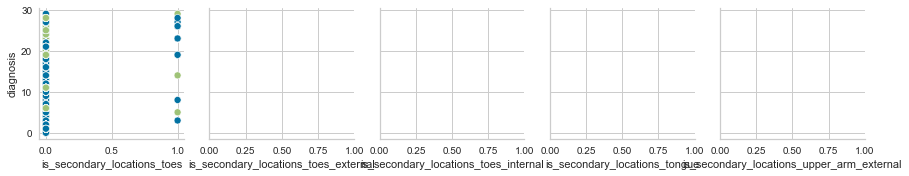

In [29]:
sns.pairplot(data, x_vars=[ 'is_secondary_locations_toes',
       'is_secondary_locations_toes_external',
       'is_secondary_locations_toes_internal', 'is_secondary_locations_tongue',
       'is_secondary_locations_upper_arm_external'], y_vars=['diagnosis'], hue="gender")

In [ ]:
g = sns.FacetGrid(data, col="duration.days", hue="gender")
g.map(sns.scatterplot, "diagnosis", "duration.days", alpha=.7)
g.add_legend()

In [ ]:
# Sum all Boolean answers of secondary location


In [ ]:
#create pipeline:                               # TODO fix
# pipe = make_pipeline(column_trans, logreg)
# cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

In [ ]:
# split into input (X) and output (y) variables
X = data.iloc[:, :-1]
print(y[:5])


## Cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = data.loc[:, ['age']]         # numerical

print(X.shape)
print(y.shape)

logreg = LogisticRegression(solver='lbfgs')

cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()
print(y.value_counts(normalized=True))

In [ ]:

ohe.fit(X['gender'])
print(ohe.categories_)

In [ ]:
ax = sns.boxplot(x='diagnosis', y='temperature', data=data)

In [ ]:
data.loc[data['temperature'] > 37.0, 'diagnosis']

In [ ]:
duration.days

# Cross validation: temperature/ diagnosis


In [ ]:
# Encode Y w OneHotEncoder
X = data.loc[:, ['temperature']]         # numerical
y = data.diagnosis
print(X.shape)
print(y.shape)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

In [ ]:
#LabelEncode pain.pain_type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initialize
print(X['pain.pain_type'].head())
data['pain.pain_type'] = le.fit_transform(data['pain.pain_type'])    # All NaN will be 2


In [ ]:

sns.scatterplot(x='diagnosis', y='pain.pain_type', data=data)
plt.xticks(rotation=45)

In [ ]:
sns.countplot(x='vesicle', data=data)           #Show the counts of observations in each categorical bin using bars.

Show value counts for two categorical variables:

In [ ]:
ax = sns.countplot(x="quantity", hue="vesicle", data=data)

# preprocessing encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)
print(obj_columns)
# prepare input data

column_trans= make_column_transformer(
    (OrdinalEncoder(), ['diagnosis']), remainder='passthrough')    # instanciate OrdinalEncoder to Encode categorical features as an integer array.
     
#oh = OneHotEncoder()
column_trans.fit_transform(X)



In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
# Correlation with the target:
absCorrWithDep = []
allVars = X.columns
print(allVars)
for var in allVars:
    absCorrWithDep.append(abs(y.corr(X[var])))


# split the data for training and testing

### We can use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.
The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# EXAMPLE FOR ENCODE:
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
print(enc.categories_)
enc.transform([['Female', 3], ['Male', 1]])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()     # instanciate OrdinalEncoder to Encode categorical features as an integer array.
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

## prepare the target variable - map the two class labels to 0 and 1 using LabelEncoder
This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable

In [ ]:
import numpy as np
np.unique(X_train[: ,2], return_counts=True)

In [ ]:
ordi = ["'0-4'", "'5-9'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'50-54'"]                                    # assigning in the correct order

In [ ]:
# check where we need to order the list before LabelEncoder
for a in range (0, 9):
    print(a, ":", np.unique(X_train[: ,a]))
    

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:

ordi = OrdinalEncoder(categories=[2])
ordi.fit(X-train[[]])

In [ ]:
np.unique(X_train[: ,3])

In [ ]:
np.unique(24-26, return_index=True)

In [ ]:
# call these functions to prepare our data:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)